In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [48]:
def datestart(line):
    pattern = '^([0-9])([0-9])(\/)([0-9])([0-9])(\/)([0-9])([0-9])'
    if re.match(pattern, line):
        return True
    return False

In [66]:
file = open("w_chat.txt")

# file.readline(4) - to read 4 chars
# file.readline()[2] - to read 3rd char

file.readline()
i=0

#chat = pd.DataFrame()

whole_file_df = []
messg = []

date, time, member, msg = None, None, None, None
while True:
    line = file.readline()
    #print(line)
    if not line:
        break
    line = line.rstrip()           # for removing right spaces if any.    
    
    if datestart(line):
        if len(messg) > 0:
            whole_file_df.append([date, time, member, ' '.join(messg)])
        messg.clear()
        
        date_time = line.split(' - ')[0]
        member_msg = line.split(' - ')[1]
        date, time = date_time.split(', ')
        if len(member_msg.split(': ')) < 2 or len(member_msg.split(': ')) > 2:
            continue
        member, msg = member_msg.split(': ')
        messg.append(msg)
    else:
        messg.append(line)
        
#     if len(member_msg.split(': ')) < 2 or len(member_msg.split(': ')) > 2:
#         continue
    

    i += 1
    
print(i)    

chat_data = pd.DataFrame(whole_file_df, columns = ['Date', 'Time', 'Member', 'Msg'])
chat_data["Date"] = pd.to_datetime(chat_data["Date"])

14120


In [67]:
print(len(whole_file_df))
print(len(messg))

14018
1


In [60]:
print(chat_data.tail())

            Date     Time         Member                               Msg
14013 2020-09-22  2:10 pm        Prakash       Eju tu itna gir gaya be 🤣🤣🤣
14014 2020-09-22  2:39 pm   Ejaz Hasnain  Jo bhej rha tha usse pooch pehle
14015 2020-09-22  2:39 pm   Ejaz Hasnain                       Uski gf hai
14016 2020-09-22  2:45 pm  Bikram Biswas        lundo facebook post tha ek
14017 2020-09-22  2:45 pm  Bikram Biswas                              salo


In [61]:
chat_data["Member"].value_counts()

Bikram Biswas    7285
Sagar            3826
Ejaz Hasnain     2055
Prakash           456
Priyanshu         396
Name: Member, dtype: int64

In [68]:
chat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 4 columns):
Date      14018 non-null datetime64[ns]
Time      14018 non-null object
Member    14018 non-null object
Msg       14018 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 438.2+ KB


In [64]:
print(chat_data.head())

        Date     Time         Member                                Msg
0 2020-10-02  7:43 pm  Bikram Biswas           Waiting for this message
1 2020-10-02  7:44 pm   Ejaz Hasnain  Whi awkward na ho isiliye kar rhi
2 2020-10-02  7:44 pm   Ejaz Hasnain                   Aisa toh bta rhi
3 2020-10-02  7:44 pm   Ejaz Hasnain                Ab baaki ka nhi pta
4 2020-10-02  7:44 pm  Bikram Biswas                      konsa awkward


In [69]:
chat_data.describe()

Date      Time         Member              Msg
count                 14018     14018          14018            14018
unique                  164      1132              5            11518
top     2020-02-15 00:00:00  10:46 pm  Bikram Biswas  <Media omitted>
freq                    597        63           7285              334
first   2020-01-03 00:00:00       NaN            NaN              NaN
last    2020-12-03 00:00:00       NaN            NaN              NaN

In [118]:
chat_data["Member"].value_counts()

Bikram Biswas    7285
Sagar            3826
Ejaz Hasnain     2055
Prakash           456
Priyanshu         396
Name: Member, dtype: int64

In [74]:
chat_data.shape[0]

14018

In [78]:
chat_data[chat_data["Msg"] == "<Media omitted>"]

Date      Time         Member              Msg
89    2020-11-02  11:13 am  Bikram Biswas  <Media omitted>
145   2020-12-02   1:26 pm          Sagar  <Media omitted>
146   2020-12-02   1:26 pm          Sagar  <Media omitted>
181   2020-12-02   4:04 pm          Sagar  <Media omitted>
329   2020-02-14   8:44 pm          Sagar  <Media omitted>
...          ...       ...            ...              ...
13793 2020-09-15   1:37 pm  Bikram Biswas  <Media omitted>
13827 2020-09-15   1:55 pm        Prakash  <Media omitted>
13836 2020-09-15   2:04 pm  Bikram Biswas  <Media omitted>
13878 2020-09-15   7:37 pm  Bikram Biswas  <Media omitted>
13945 2020-09-16   2:30 pm   Ejaz Hasnain  <Media omitted>

[334 rows x 4 columns]

In [90]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 51 kB 487 kB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49714 sha256=4d986c11439d7d9b49d90f679bcfe6b56797f19ceb0cc3c9960d2cc585eebce3
  Stored in directory: /home/sagar/.cache/pip/wheels/ea/f9/6a/e02b0956d0f038df6781a14347b89929b2b8ccd6b33c733432
Successfully built emoji
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [91]:
import regex
import emoji

def emojis_count(msg):
    list_ = []
    data = regex.findall(r'\X', msg)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            list_.append(word)
            
    return list_        

In [95]:
total_msg = 14018
media_msg = 334
emojis = chat_data["Msg"].apply(emojis_count)
chat_data["emojis"] = emojis
emojis = np.sum(chat_data.emojis.str.len())
pattern = r'(https?://\S+)'
chat_data["url_count"] = chat_data["Msg"].apply(lambda x: re.findall(pattern, x)).str.len()
links = np.sum(chat_data["url_count"])

print(f'total_msg {total_msg}')
print(f'media_msg {media_msg}')
print(f'emojis {emojis}')
print(f'links {links}')

total_msg 14018
media_msg 334
emojis 3228
links 138


In [99]:
# dropping off the media_msgs

media_msg = chat_data[chat_data["Msg"] == "<Media omitted>"]
msg_ = chat_data.drop(media_msg.index)
chat_data.head()

Date     Time         Member                                Msg  \
0 2020-10-02  7:43 pm  Bikram Biswas           Waiting for this message   
1 2020-10-02  7:44 pm   Ejaz Hasnain  Whi awkward na ho isiliye kar rhi   
2 2020-10-02  7:44 pm   Ejaz Hasnain                   Aisa toh bta rhi   
3 2020-10-02  7:44 pm   Ejaz Hasnain                Ab baaki ka nhi pta   
4 2020-10-02  7:44 pm  Bikram Biswas                      konsa awkward   

   url_count emojis  
0          0     []  
1          0     []  
2          0     []  
3          0     []  
4          0     []

In [103]:
# letter and word count

chat_data["letters"] = chat_data["Msg"].apply(lambda x: len(x))
chat_data["words"] = chat_data["Msg"].apply(lambda x: len(x.split(' ')))
chat_data.head()

Date     Time         Member                                Msg  \
0 2020-10-02  7:43 pm  Bikram Biswas           Waiting for this message   
1 2020-10-02  7:44 pm   Ejaz Hasnain  Whi awkward na ho isiliye kar rhi   
2 2020-10-02  7:44 pm   Ejaz Hasnain                   Aisa toh bta rhi   
3 2020-10-02  7:44 pm   Ejaz Hasnain                Ab baaki ka nhi pta   
4 2020-10-02  7:44 pm  Bikram Biswas                      konsa awkward   

   url_count emojis  letters  words  
0          0     []       24      4  
1          0     []       33      7  
2          0     []       16      4  
3          0     []       19      5  
4          0     []       13      2

In [109]:
chat_data.groupby('Member').sum()

url_count  letters  words
Member                                  
Bikram Biswas         50   138974  28415
Ejaz Hasnain          42    50052   9982
Prakash                8    10239   2076
Priyanshu              7    12427   2446
Sagar                 31    80013  17203

In [112]:
chat_data.head()

Date     Time         Member                                Msg  \
0 2020-10-02  7:43 pm  Bikram Biswas           Waiting for this message   
1 2020-10-02  7:44 pm   Ejaz Hasnain  Whi awkward na ho isiliye kar rhi   
2 2020-10-02  7:44 pm   Ejaz Hasnain                   Aisa toh bta rhi   
3 2020-10-02  7:44 pm   Ejaz Hasnain                Ab baaki ka nhi pta   
4 2020-10-02  7:44 pm  Bikram Biswas                      konsa awkward   

   url_count emojis  letters  words  
0          0     []       24      4  
1          0     []       33      7  
2          0     []       16      4  
3          0     []       19      5  
4          0     []       13      2

In [127]:
users = chat_data.Member.unique()
users

array(['Bikram Biswas', 'Ejaz Hasnain', 'Sagar', 'Priyanshu', 'Prakash'],
      dtype=object)

In [137]:
for user in users:
    user_data = chat_data[chat_data["Member"] == user]
    #print(user_data.head())
    msg_count = user_data.shape[0]
    #print(msg_count)
    words = (np.sum(user_data["words"]))/msg_count
    emojis_ = np.sum(user_data["emojis"].str.len())
    links_ = np.sum(user_data["url_count"])
    print(f"{user} - msgs-{msg_count} words per msg-{words} emojis-{emojis_} links-{links_}")    

Bikram Biswas - msgs-7285 words per msg-3.9004804392587507 emojis-1816 links-50
Ejaz Hasnain - msgs-2055 words per msg-4.8574209245742095 emojis-482 links-42
Sagar - msgs-3826 words per msg-4.496340825927862 emojis-332 links-31
Priyanshu - msgs-396 words per msg-6.1767676767676765 emojis-241 links-7
Prakash - msgs-456 words per msg-4.552631578947368 emojis-357 links-8


In [157]:
# word map
# for this, we have to make a list of unique words
bad_chars = ['.',',','?','*','@','/','!','#']

all_words = ' '.join(a for b in chat_data["Msg"] for a in b.split())
all_words = ''.join(a for a in all_words if not a in bad_chars)
print(len(all_words))
print(all_words)

300757
Waiting for this message Whi awkward na ho isiliye kar rhi Aisa toh bta rhi Ab baaki ka nhi pta konsa awkward Whi sagar ke saamne Kya mere saamne be Do log k wajeh se trip ka rehne ka kaese change ho jauga Nhi maloom bhai Achanak se kya hua aur sala vaksi unke sath free mei jab sala wo to plan mei bi nai tha Usko toh include karwayi yeh log sagar mai kya keh rsha chill marne to jane wale nai unka jo bi relative hai apan airbnb karte hai jo dikhaya tha Aur koi beach ke paas kitna mehenga padega Waise woh bhi sahi rhega Bas jaate hi scooty ka intezaam karna hoga Ha jo thk krte hai be Ha Ruk fir Saala pura mood ka satyanaas kr rhi ye kog Sorry be Mere wajeh se ye ho rha Arey chodd na Maza karenge bhai humlog jam ke Bas iss grp ka name change nhi hone dena hai future goals me hai yeh Hmm Abe bol Namrata kis kis se akele me baat Kiya Aur kya bat ki bol word to word This message was deleted batai thike relative ka pool and all hai bas rat ka sone ka dekhna hai baki sara din chill mar 

In [162]:
#pip install wordcloud
#pip install stopwords
all_words.replace("Media", "")
all_words

"Waiting for this message Whi awkward na ho isiliye kar rhi Aisa toh bta rhi Ab baaki ka nhi pta konsa awkward Whi sagar ke saamne Kya mere saamne be Do log k wajeh se trip ka rehne ka kaese change ho jauga Nhi maloom bhai Achanak se kya hua aur sala vaksi unke sath free mei jab sala wo to plan mei bi nai tha Usko toh include karwayi yeh log sagar mai kya keh rsha chill marne to jane wale nai unka jo bi relative hai apan airbnb karte hai jo dikhaya tha Aur koi beach ke paas kitna mehenga padega Waise woh bhi sahi rhega Bas jaate hi scooty ka intezaam karna hoga Ha jo thk krte hai be Ha Ruk fir Saala pura mood ka satyanaas kr rhi ye kog Sorry be Mere wajeh se ye ho rha Arey chodd na Maza karenge bhai humlog jam ke Bas iss grp ka name change nhi hone dena hai future goals me hai yeh Hmm Abe bol Namrata kis kis se akele me baat Kiya Aur kya bat ki bol word to word This message was deleted batai thike relative ka pool and all hai bas rat ka sone ka dekhna hai baki sara din chill mar sakte 

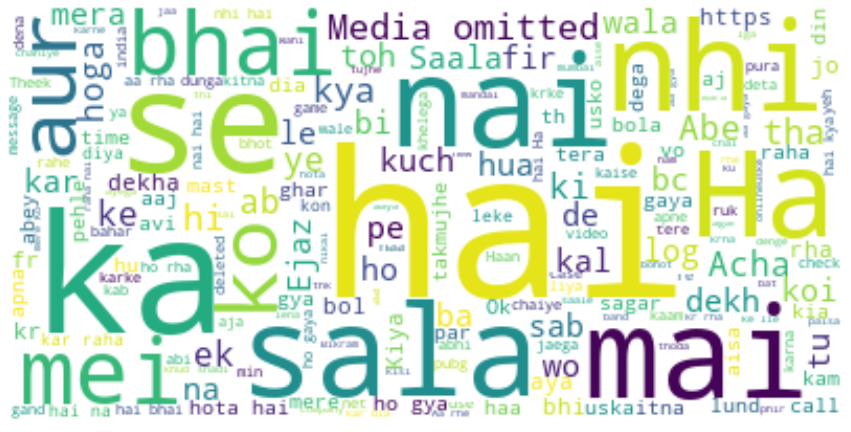

In [163]:
from wordcloud import WordCloud
#from stopwords import STOPWORDS

#stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color="white").generate(all_words)

plt.figure( figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [167]:
# Time for Emojis

emojis_list = list([a for b in chat_data["emojis"] for a in b])
len(emojis_list)

3228

In [183]:
from collections import Counter

emoji = dict((Counter(emojis_list)))
emoji = sorted(emoji.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji, columns=['emoji', 'count'])
emoji_df

emoji  count
0      🤣   1703
1      😂    478
2      😅    300
3      😶     91
4      😄     90
..   ...    ...
74    🕶️      1
75    🖕🏿      1
76    🙏🏻      1
77     😌      1
78    ❤️      1

[79 rows x 2 columns]

<Figure size 1080x576 with 0 Axes>

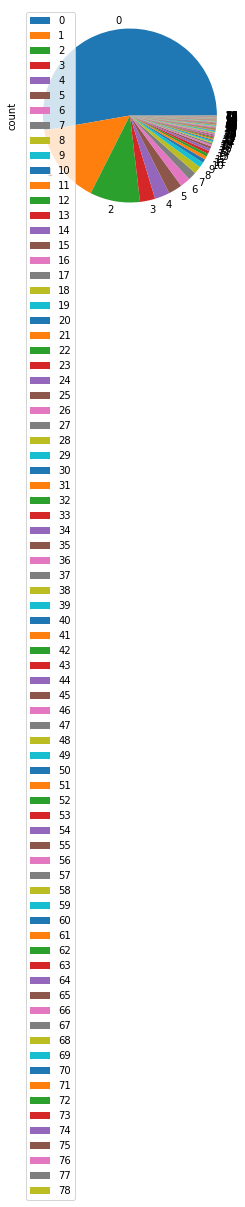

In [196]:
plt.figure( figsize=(15,8))
emoji_df.plot.pie(x = 'emoji', y='count')

plt.show()

In [197]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji',title='Emoji Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [198]:
chat_data.head()

Date     Time         Member                                Msg  \
0 2020-10-02  7:43 pm  Bikram Biswas           Waiting for this message   
1 2020-10-02  7:44 pm   Ejaz Hasnain  Whi awkward na ho isiliye kar rhi   
2 2020-10-02  7:44 pm   Ejaz Hasnain                   Aisa toh bta rhi   
3 2020-10-02  7:44 pm   Ejaz Hasnain                Ab baaki ka nhi pta   
4 2020-10-02  7:44 pm  Bikram Biswas                      konsa awkward   

   url_count emojis  letters  words  
0          0     []       24      4  
1          0     []       33      7  
2          0     []       16      4  
3          0     []       19      5  
4          0     []       13      2

In [233]:
msg_count = pd.DataFrame(chat_data.groupby('Date')[['Msg']].count(), columns = ['Msg'])
#msg_count.reset_index()
msg_count.head()

Msg
Date           
2020-01-03    9
2020-01-05  186
2020-01-06   27
2020-01-07    8
2020-01-09   29

In [236]:
msg_count.index

DatetimeIndex(['2020-01-03', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-09', '2020-02-03', '2020-02-05', '2020-02-06',
               '2020-02-09', '2020-02-13',
               ...
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-11-02',
               '2020-11-03', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-12-02', '2020-12-03'],
              dtype='datetime64[ns]', name='Date', length=164, freq=None)

In [232]:
msg_count.Msg

Date
2020-01-03      9
2020-01-05    186
2020-01-06     27
2020-01-07      8
2020-01-09     29
             ... 
2020-11-05     41
2020-11-06     37
2020-11-07    145
2020-12-02    137
2020-12-03     14
Name: Msg, Length: 164, dtype: int64

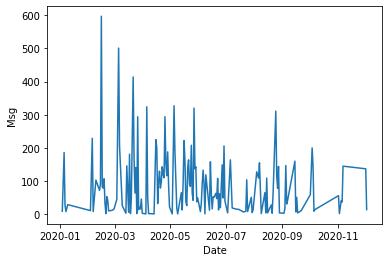

<Figure size 1296x648 with 0 Axes>

In [246]:
sns.lineplot(data = msg_count, x = msg_count.index, y = "Msg")
#msg_count.plot(x = msg_count.index, y = "Msg")
plt.figure(figsize = (18,9))
plt.show()

In [207]:
msg_count["Date"]

KeyError: 'Date'